In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0-rc1


In [2]:
url = 'https://raw.githubusercontent.com/Mshire130/Ml-datasets/master/Concrete_Data_Yeh.csv'
raw_data = pd.read_csv(url) 
#Scanning for any NaNs
raw_data.isnull().any()

cement              False
slag                False
flyash              False
water               False
superplasticizer    False
coarseaggregate     False
fineaggregate       False
age                 False
csMPa               False
dtype: bool

In [3]:
raw_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#Separating train and test dataset, 70-30 split.
train_data = raw_data.sample(frac=0.7, random_state=0)
test_data = raw_data.drop(train_data.index) 

train_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3,26.06
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3,9.69


In [0]:
train_label = train_data.pop('csMPa')
test_label = test_data.pop('csMPa')

In [6]:
#normalising data
train_stats = train_data.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cement,721.0,281.346602,104.505455,102.0,194.7,266.0,350.0,540.0
slag,721.0,71.850902,85.812598,0.0,0.0,20.0,141.3,359.4
flyash,721.0,55.238419,63.853538,0.0,0.0,0.0,118.3,200.1
water,721.0,182.108044,21.215630,121.8,164.9,185.7,192.9,247.0
superplasticizer,721.0,6.091262,5.998052,0.0,0.0,6.0,10.2,32.2
coarseaggregate,721.0,974.500000,76.926675,801.0,932.0,968.0,1029.4,1145.0
fineaggregate,721.0,771.734535,80.189816,594.0,719.7,779.3,825.0,992.6
age,721.0,45.313454,62.168311,1.0,14.0,28.0,56.0,365.0


In [7]:
#Fucntion for normalising data
def norm(x):
  return ((x - train_stats['mean'])/train_stats['std'])


#Normalising data
norm_train_data = norm(train_data)
norm_test_data = norm(test_data)

norm_train_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
747,2.092268,-0.837300,-0.86508,0.843338,-1.015540,1.956408,-1.979485,-0.680627
718,-1.519027,1.305742,-0.86508,1.008311,-1.015540,-0.211890,0.353729,-0.616286
175,0.777504,1.365174,-0.86508,-0.811102,0.918421,-0.387382,-0.198710,0.734885
828,2.302783,-0.837300,-0.86508,-1.701955,-1.015540,-1.020452,1.549641,-0.278493
713,-1.189858,1.912879,-0.86508,0.466258,-1.015540,-0.508276,0.118038,-0.680627


In [8]:
#building model 
model = keras.Sequential([
        keras.layers.Dense(64, activation = tf.nn.relu, input_shape = [len(train_data.keys())]), 
        keras.layers.Dense(64, activation = tf.nn.relu),
        keras.layers.Dense(1) ])


model.compile( loss = 'mean_squared_error',
               optimizer = keras.optimizers.RMSprop(0.001),
               metrics = ['mean_squared_error','mean_absolute_error']
          )

W0624 19:48:00.204889 140609571891072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
history = model.fit(norm_train_data, train_label, epochs = 500, validation_split = 0.2)


Train on 576 samples, validate on 145 samples
Epoch 1/500
576/576 [==============================] - 0s 264us/sample - loss: 1417.2547 - mean_squared_error: 1417.2548 - mean_absolute_error: 33.8584 - val_loss: 1351.3294 - val_mean_squared_error: 1351.3295 - val_mean_absolute_error: 32.6231
Epoch 2/500
576/576 [==============================] - 0s 51us/sample - loss: 1222.7682 - mean_squared_error: 1222.7682 - mean_absolute_error: 30.9641 - val_loss: 1126.1262 - val_mean_squared_error: 1126.1262 - val_mean_absolute_error: 29.1232
Epoch 3/500
576/576 [==============================] - 0s 56us/sample - loss: 989.2045 - mean_squared_error: 989.2044 - mean_absolute_error: 27.2209 - val_loss: 878.3587 - val_mean_squared_error: 878.3587 - val_mean_absolute_error: 24.7477
Epoch 4/500
576/576 [==============================] - 0s 53us/sample - loss: 745.3545 - mean_squared_error: 745.3544 - mean_absolute_error: 22.9386 - val_loss: 636.8327 - val_mean_squared_error: 636.8326 - val_mean_absolute_

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error,epoch
0,1417.254673,1417.254761,33.858418,1351.329407,1351.329468,32.623066,0
1,1222.768222,1222.768188,30.964098,1126.126169,1126.126221,29.123249,1
2,989.204481,989.204407,27.220940,878.358728,878.358704,24.747702,2
3,745.354451,745.354370,22.938614,636.832700,636.832642,20.091705,3
4,522.891391,522.891418,18.529984,436.924059,436.924042,16.237959,4


In [0]:
#Function for plotting MAE and MSE
def plot_history(history):
  plt.figure()
  plt.plot(hist['epoch'], hist['mean_squared_error'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val error')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.ylim([0,400])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val error')
  plt.ylim([0,20])
  plt.legend()
  
  plt.show()
  

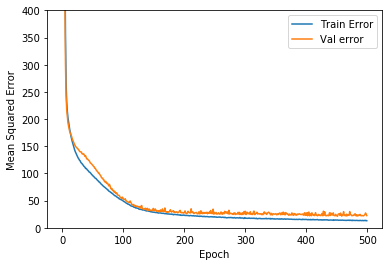

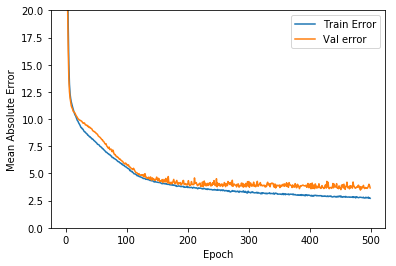

In [15]:
plot_history(history)

In [20]:
loss, mse, mae = model.evaluate(norm_test_data, test_label)

print(f'Testing set Mean Abs Error : {mae} MPa') 

309/309 [==============================] - 0s 46us/sample - loss: 39.3083 - mean_squared_error: 39.3083 - mean_absolute_error: 4.4127
Testing set Mean Abs Error : 4.412693500518799 MPa


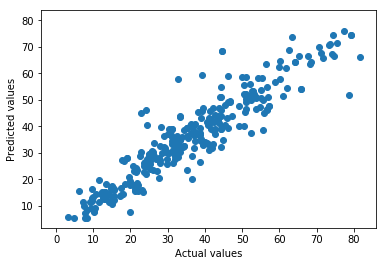

In [31]:
test_predictions = model.predict(norm_test_data)

plt.figure()
plt.scatter(test_label, test_predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([0,0],[80,80])



It would be nice to check this model against realtime concrete lab results. Will consider this once back at university. 